KÜME ANALİZİ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
# Veri setini oku
df = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/iris.csv")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
y = df.species # çiçek türü
df = df.drop('species', axis=1) # y kolonu drop

In [ ]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
#SciPy ile kümeleme
hc = linkage(df, method="centroid", metric="euclidean")

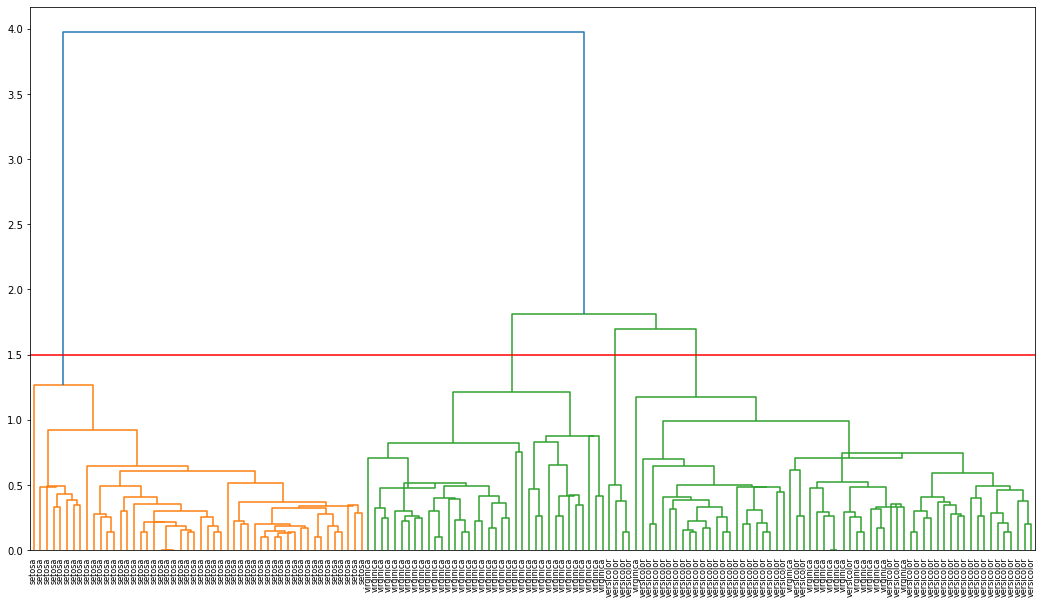

In [ ]:
fig = plt.figure(figsize=(18,10))
dn = dendrogram(hc, leaf_label_func=lambda id: y.values[id], leaf_font_size=8)
plt.axhline(y=1.5, color='red')

PCA ile

In [ ]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data
from sklearn.decomposition import PCA

In [ ]:
# fit-transform => StandartScaler() => kolon ortalaması=>0, kolon standart sapması =>1
df = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)

In [ ]:
pca = PCA(n_components=4)

In [ ]:
pca.fit(df)

PCA(n_components=4)

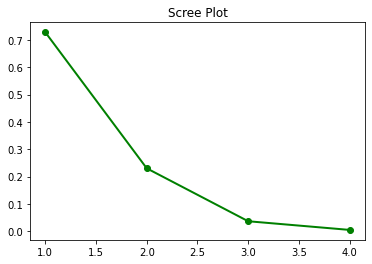

In [ ]:
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='green')
plt.title("Scree Plot")
plt.show()

In [ ]:
# K-means
km = KMeans(n_clusters=3, init='k-means++', n_init=10)


In [ ]:
km.fit(df)

KMeans(n_clusters=3)

In [ ]:
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

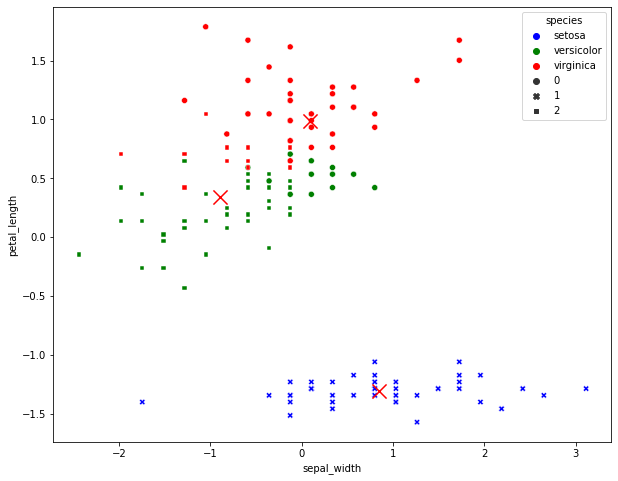

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x=df.columns[1], y=df.columns[2],data=df, hue=y, style=km.labels_, palette=['blue','green','red'])
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,2], marker='x', s=200, c='red')

In [ ]:
km.predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)